In [50]:
.libPaths("/mnt/home/icb/laura.martens/miniconda3/envs/archr/lib/R/library")
library(Signac)
library(Seurat)
library(anndata)
library(stringr)

In [22]:
setwd('/lustre/groups/ml01/workspace/laura.martens/atac_poisson_data/benchmark/aerts/signac/')

In [97]:
library(Matrix)
library(data.table)

In [98]:
atac <- readRDS(paste0('/lustre/groups/ml01/workspace/laura.martens/data/aerts_fly_brain/combined.rds')) 

In [99]:
min_cells=as.integer(length(Cells(atac))*0.01)

In [110]:
filter_regions = Matrix::rowSums(atac[['ATAC']]@data) >= min_cells

In [107]:
filter_cells = !(str_detect(atac[[]]$CellType_lvl1, '^-$') | str_detect(atac[[]]$CellType_lvl1, 'unk'))

In [111]:
length(filter_regions)

[1] 129078

In [113]:
atac <- atac[filter_regions, filter_cells]

In [114]:
atac <- RunTFIDF(atac)
atac <- FindTopFeatures(atac, min.cutoff = 'q0')
atac <- RunSVD(atac)

Performing TF-IDF normalization

Running SVD

Scaling cell embeddings



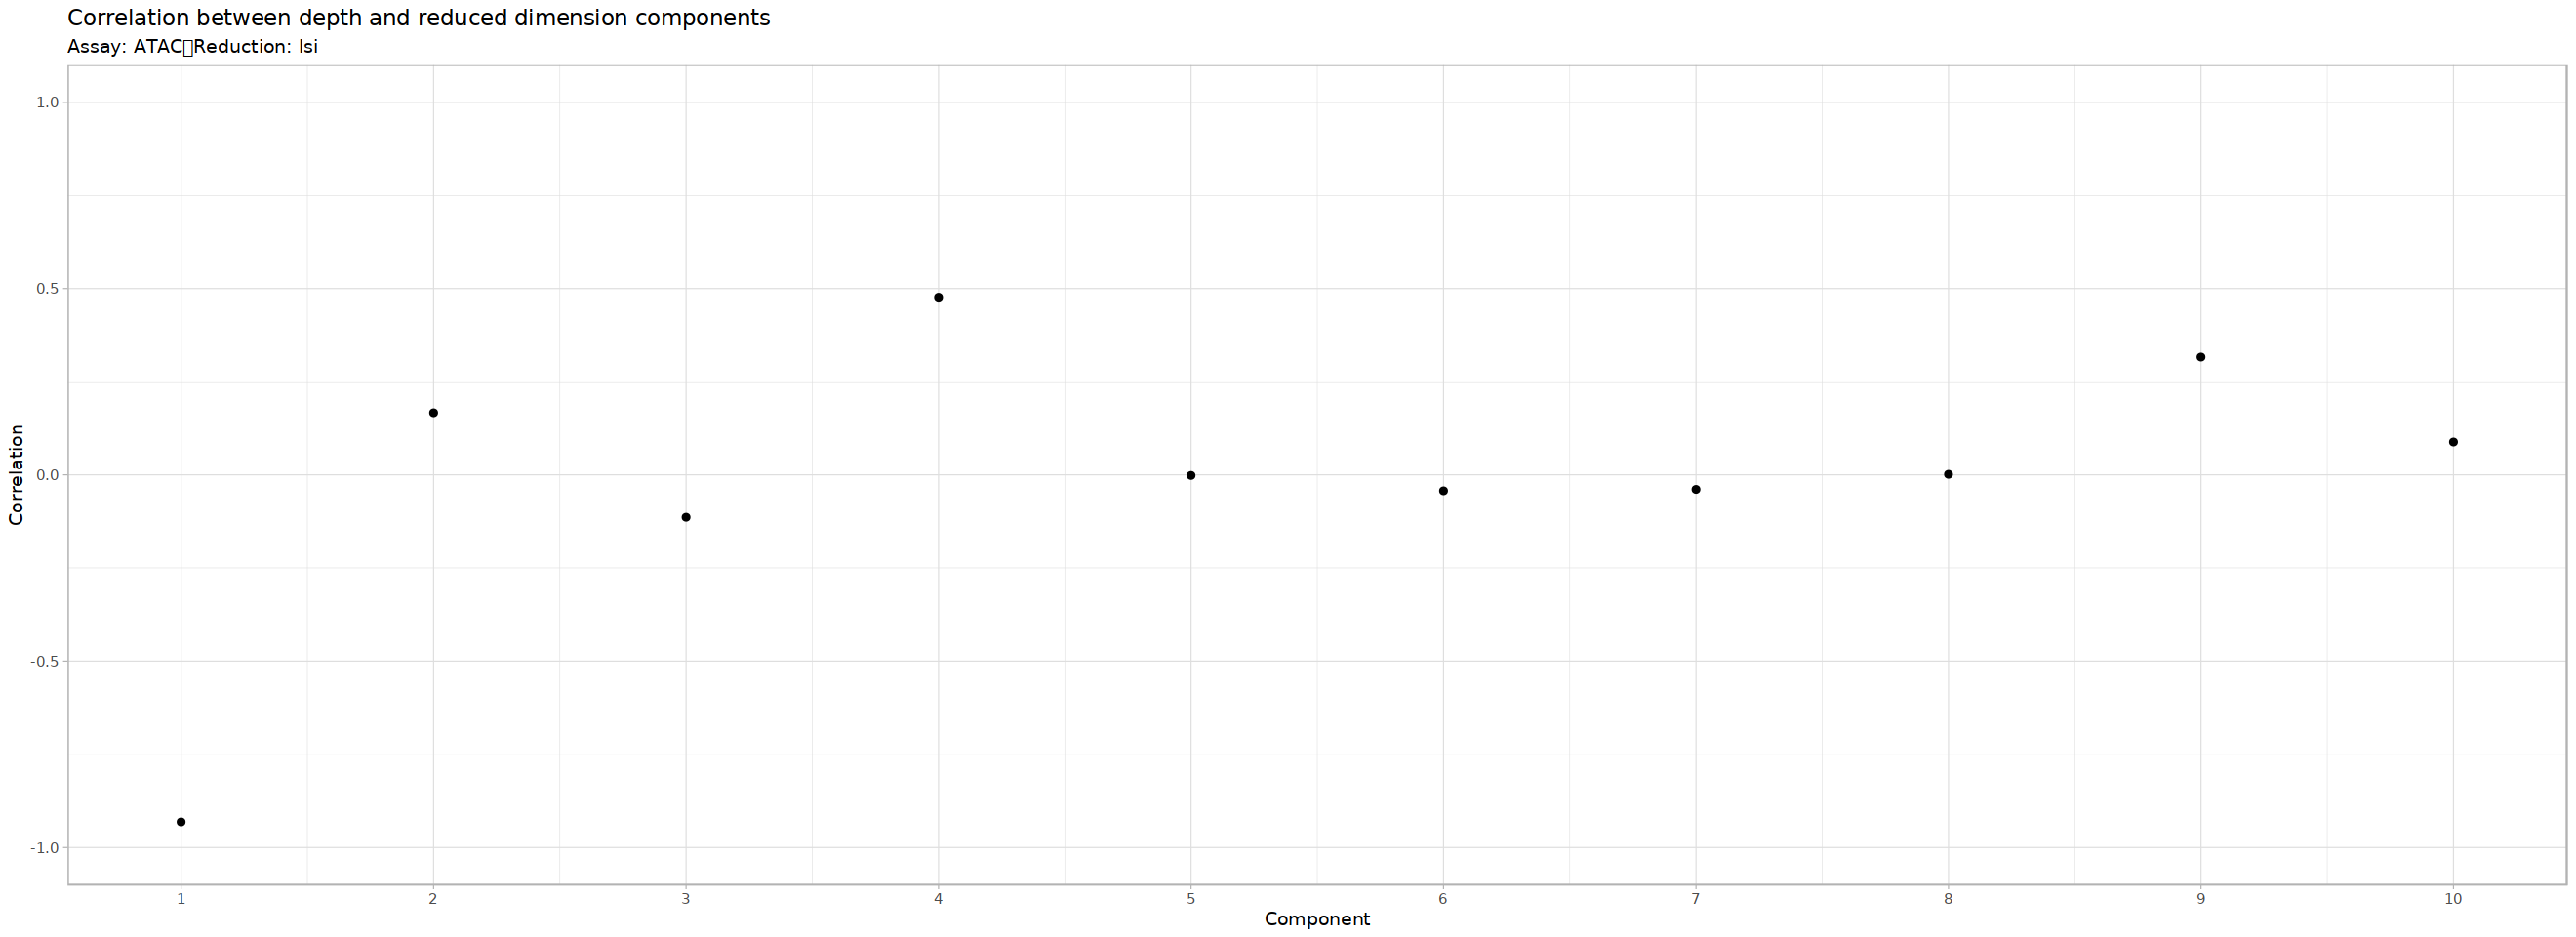

In [115]:
DepthCor(atac)

In [117]:
embedding = Embeddings(atac[['lsi']])[,2:30] #remove first component

In [118]:
write.csv(embedding, file = 'embedding.csv')

In [119]:
atac <- RunUMAP(object = atac, reduction = 'lsi', dims = 2:30)

13:18:53 UMAP embedding parameters a = 0.9922 b = 1.112

13:18:53 Read 117613 rows and found 29 numeric columns

13:18:53 Using Annoy for neighbor search, n_neighbors = 30

13:18:54 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

13:19:06 Writing NN index file to temp file /tmp/RtmpZw9sUA/file30b9a657709d5

13:19:06 Searching Annoy index using 1 thread, search_k = 3000

13:19:52 Annoy recall = 100%

13:19:53 Commencing smooth kNN distance calibration using 1 thread

13:19:59 Initializing from normalized Laplacian + noise

13:20:05 Commencing optimization for 200 epochs, with 5202866 positive edges

13:22:32 Optimization finished



In [120]:
p1 <- DimPlot(object = atac, group.by="CellType_lvl1") 

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



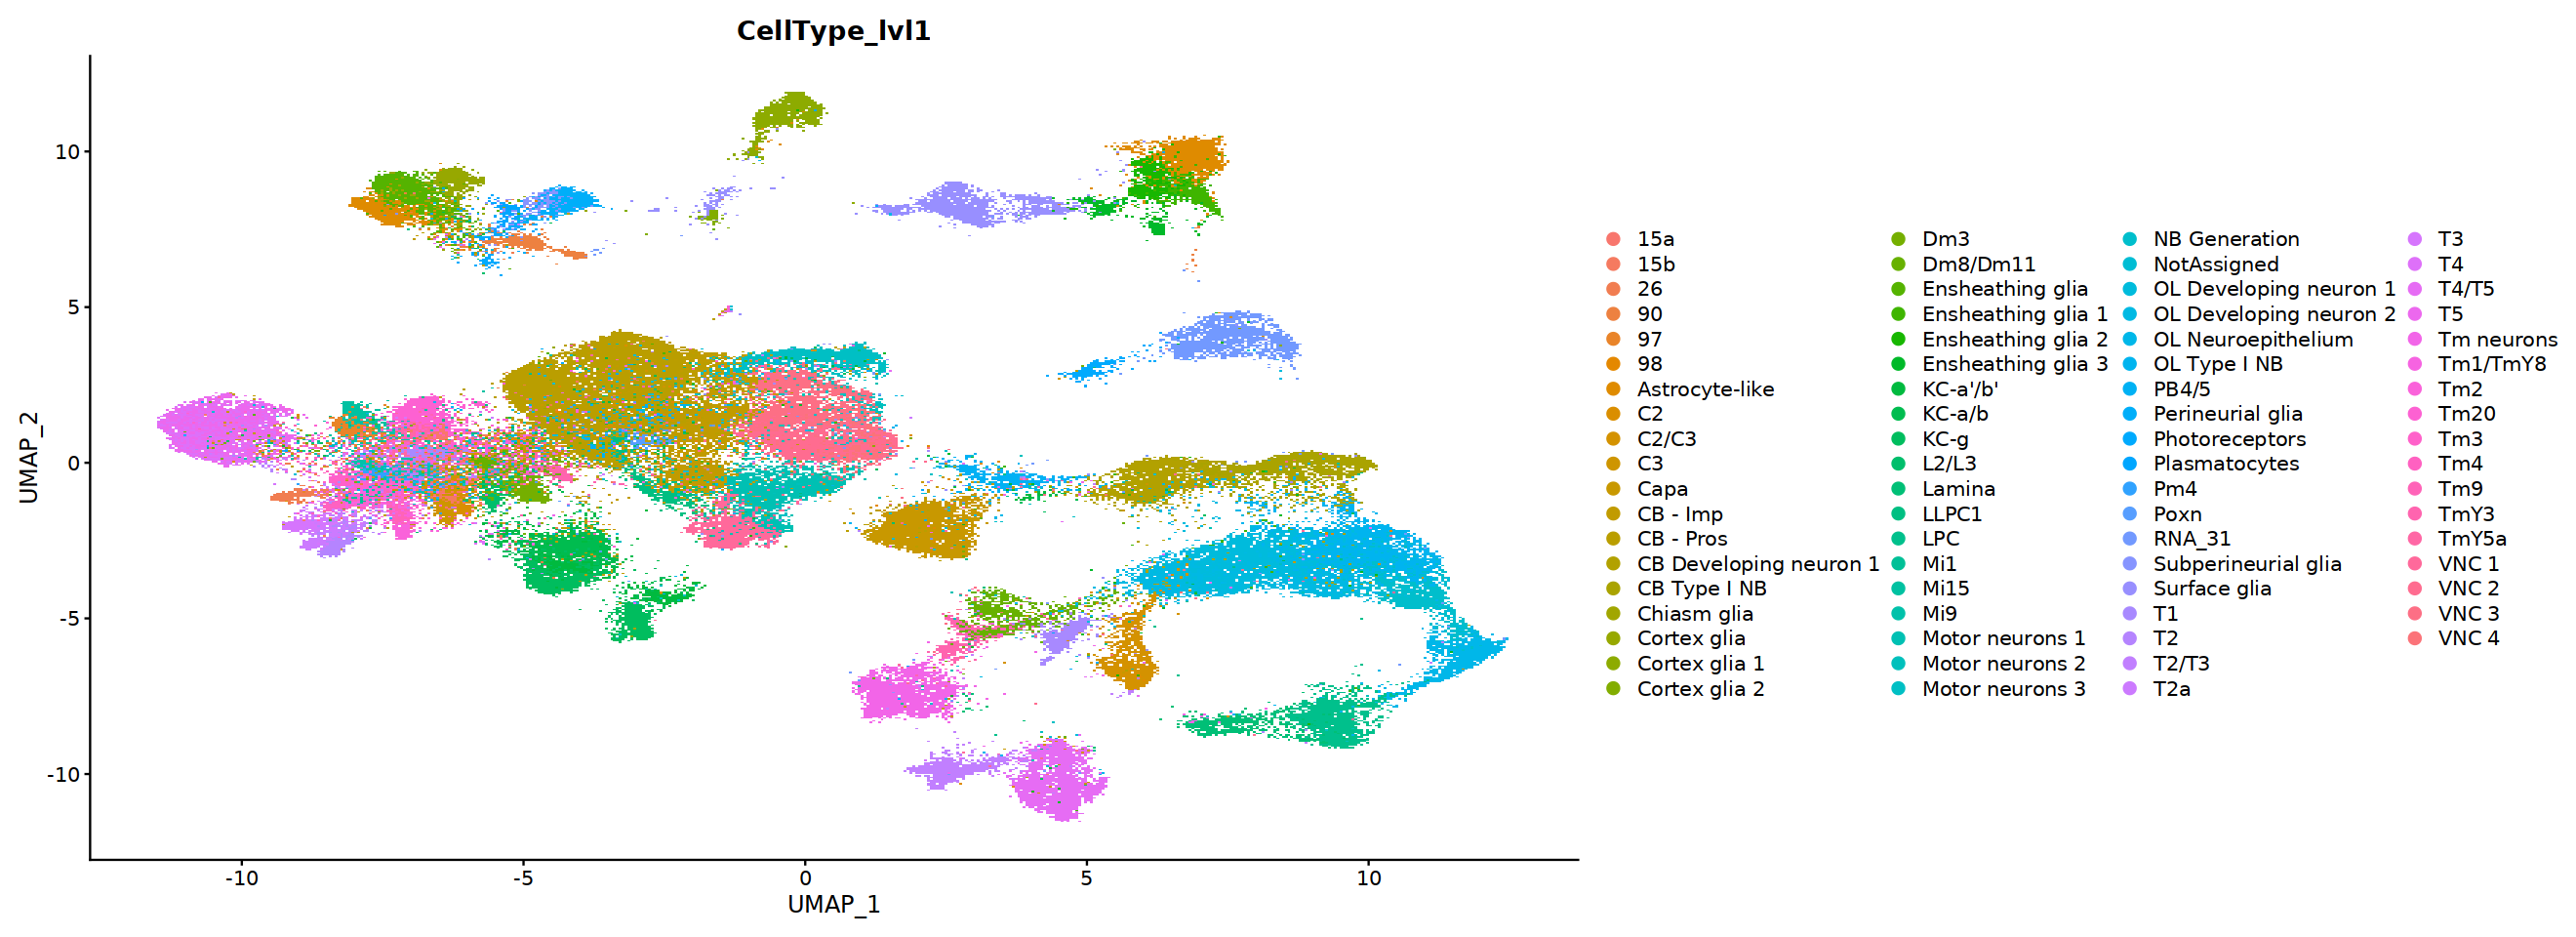

In [121]:
options(repr.plot.width=22, repr.plot.height=8) # figure size
p1

## Run Harmony

In [122]:
library(harmony)

Loading required package: Rcpp



In [165]:
sample = data.frame(sample=str_split(atac[[]]$runName, '__', simplify=TRUE)[, 2])

In [167]:
rownames(sample) = Cells(atac)

In [170]:
atac$sample = sample

In [171]:
atac

An object of class Seurat 
80772 features across 117613 samples within 1 assay 
Active assay: ATAC (80772 features, 80772 variable features)
 3 dimensional reductions calculated: lsi, umap, harmony

In [172]:
unique(atac[[]]$sample)

[1] "f2501a" "1d60cb" "e26179" "8f8273" "9c338b" "9ed3fa" "59b45b" "7bc63d"
 [9] "303662" "96a6e8" "a2d857" "c0f875" "f13919" "8569df" "2c5b14" "5e8b4e"
[17] "4e2bbb" "127e2f" "c62f88"

In [173]:
atac <- RunHarmony(
  object = atac,
  group.by.vars = 'sample',
  reduction = 'lsi',
  assay.use = 'ATAC',
  project.dim = FALSE
)

Warning message:
“did not converge in 25 iterations”
Harmony 1/10

Harmony 2/10

Harmony converged after 2 iterations



In [174]:
embedding = Embeddings(atac[['harmony']])[,2:30] #remove first component

In [175]:
write.csv(embedding, file = 'embedding_harmony.csv')

In [176]:
atac <- RunUMAP(object = atac, reduction = 'harmony', dims = 2:30)

14:19:51 UMAP embedding parameters a = 0.9922 b = 1.112

14:19:52 Read 117613 rows and found 29 numeric columns

14:19:52 Using Annoy for neighbor search, n_neighbors = 30

14:19:52 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

14:20:04 Writing NN index file to temp file /tmp/RtmpZw9sUA/file30b9a34a710ba

14:20:04 Searching Annoy index using 1 thread, search_k = 3000

14:20:52 Annoy recall = 100%

14:20:53 Commencing smooth kNN distance calibration using 1 thread

14:20:59 Initializing from normalized Laplacian + noise

14:21:06 Commencing optimization for 200 epochs, with 5225480 positive edges

14:23:35 Optimization finished



In [177]:
p2 <- DimPlot(object = atac, group.by='runName') 

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



In [180]:
p3 <- DimPlot(object = atac, group.by='CellType_lvl1') 

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



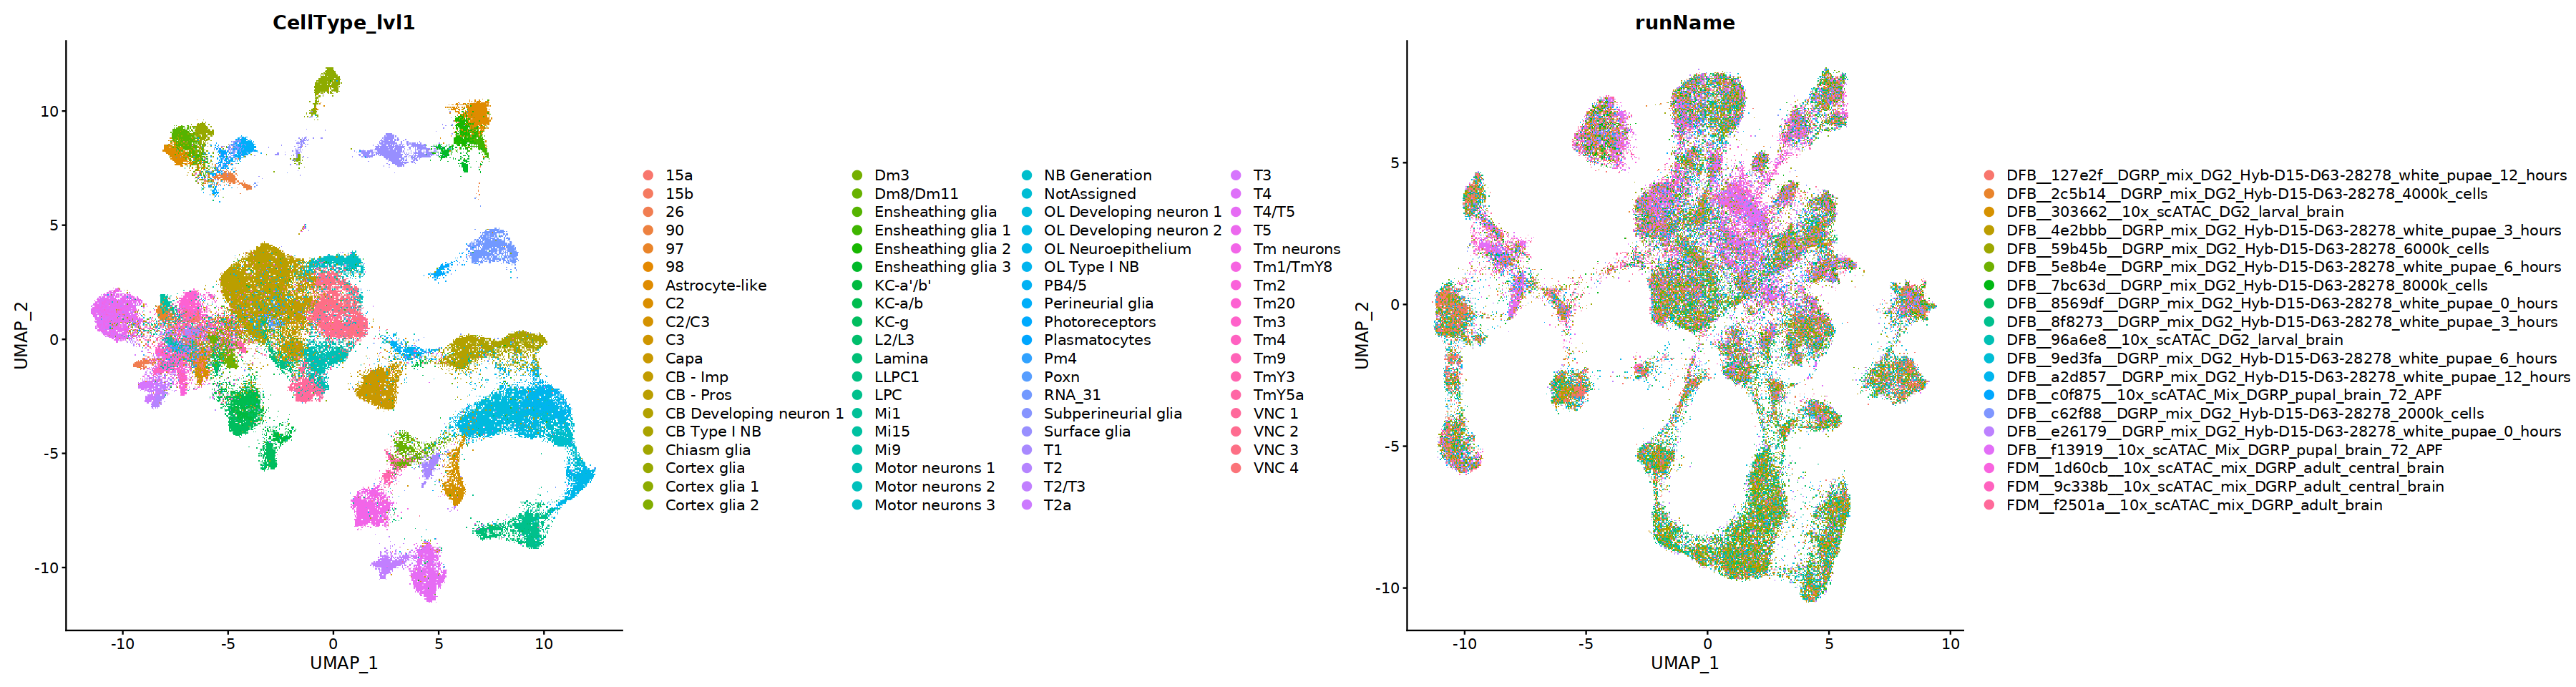

In [182]:
options(repr.plot.width=30, repr.plot.height=8) # figure size
p1 + p2 


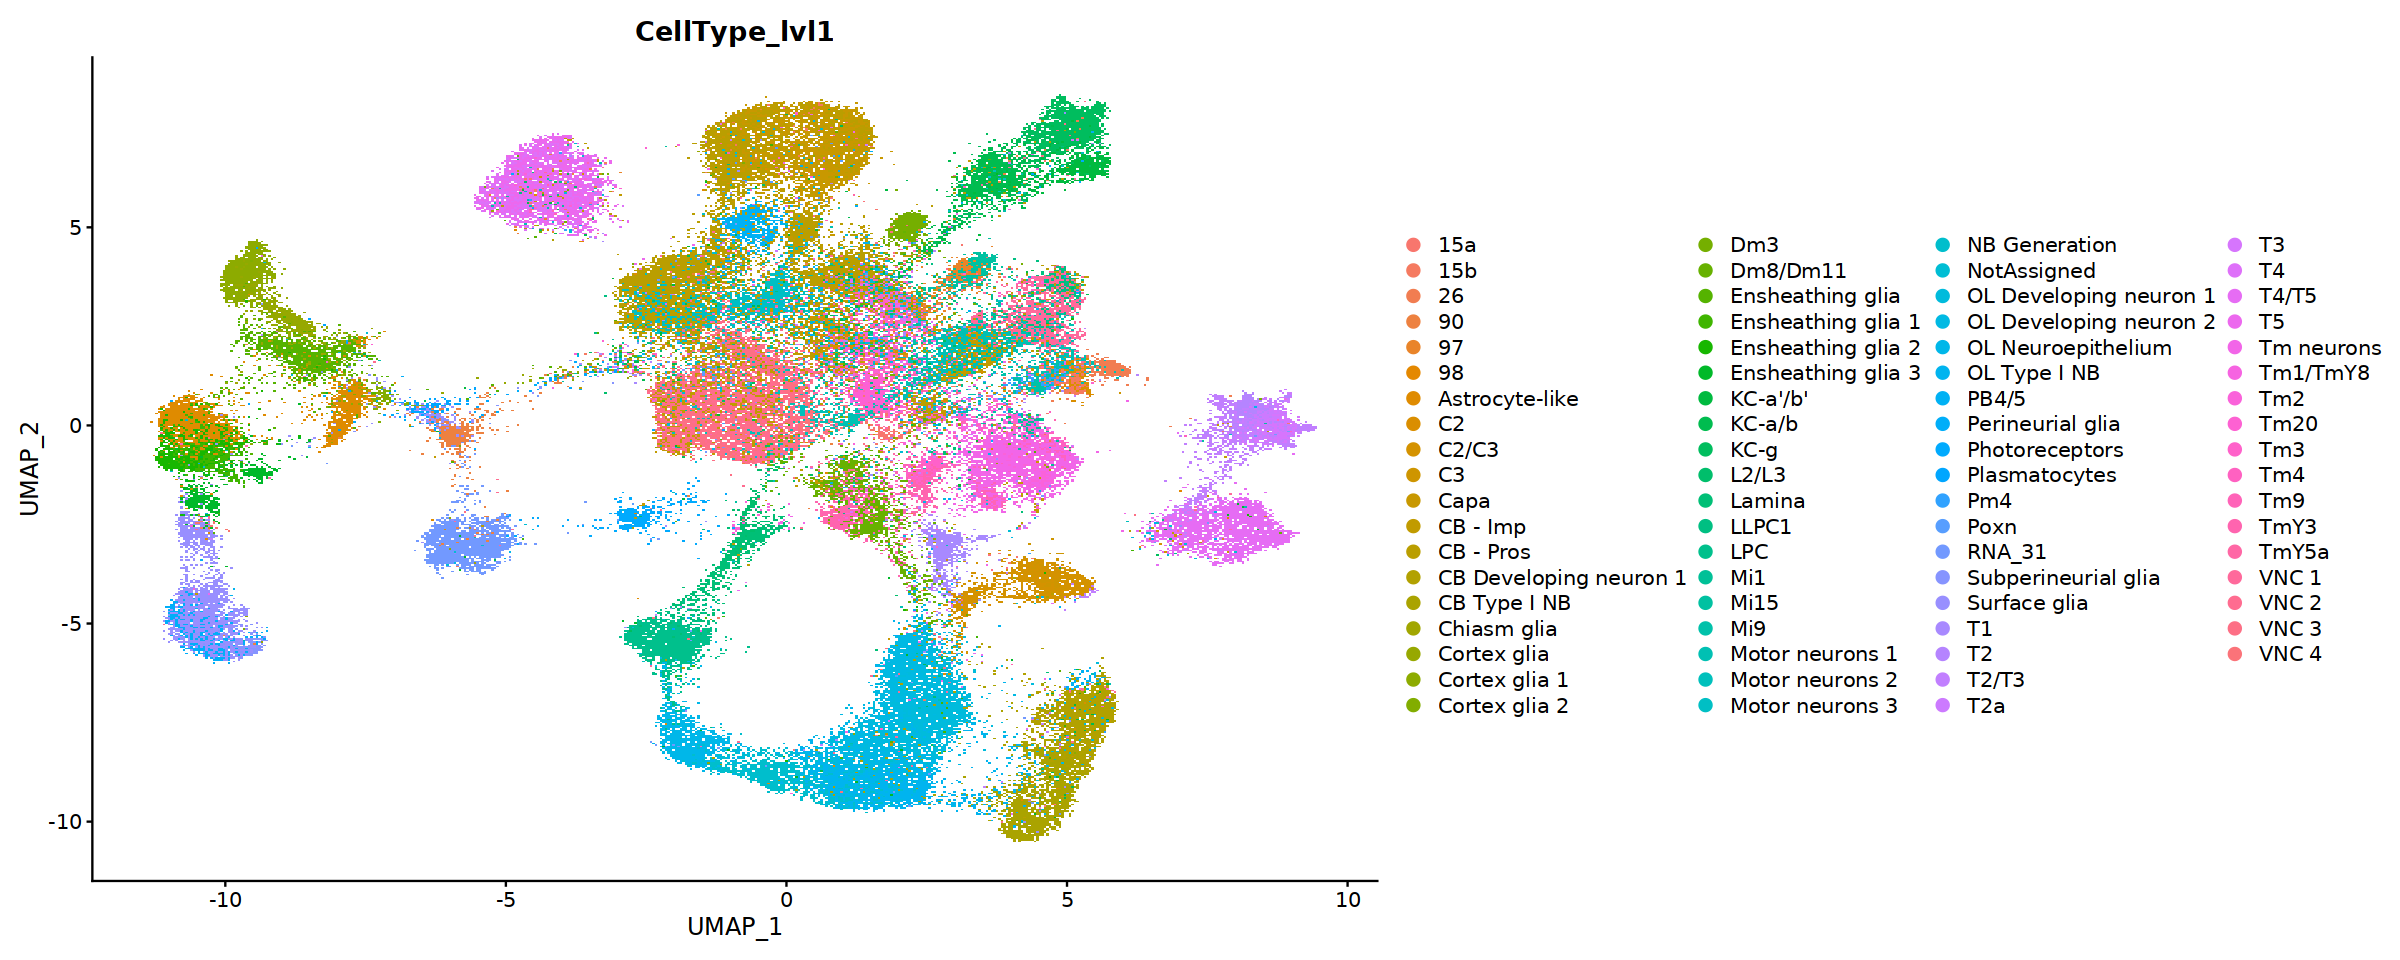

In [185]:
options(repr.plot.width=20, repr.plot.height=8) 
p3